# Integrals

Let's try calculate integral $\int_{-1}^{4} \! (2x^2-3) \, \mathrm{d}x = \frac {85} 3$


At first, we will find analytical (exact) solution:

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, integrate
x = symbols('x')
f = (2*x**2 - 3)
display(integrate(f, (x, -1, 4)))
del(x)

85/3

In [34]:
exact_solution = 85/3
print(exact_solution)

28.333333333333332


#### Rectangle method
Now we will calculate it numerically by rectangle method:

$I = \int_{a}^b f(x) \mathrm dx \approx \sum_{i=0}^{n-1}f(x_i)(x_{i+1}-x_i)$

In [35]:
from numerical_methods import rectangle_method
def func(x):
    return 2*x**2 - 3

a = -1  # lower limit
b = 4  # upper limit
n = 10  # number of subintervals
integral = rectangle_method(func, a, b, n)
print('Exact solution = ', exact_solution)
print("Approximate integral:", integral[0])
print('Difference between exact and approximate solutions equals', abs(exact_solution - integral[0]))

Exact solution =  28.333333333333332
Approximate integral: 28.125
Difference between exact and approximate solutions equals 0.20833333333333215


Let's increase the number of subintervals - rectangles

In [36]:
n = 100
integral = rectangle_method(func, a, b, n)
print('Exact solution = ', exact_solution)
print("Approximate integral:", integral[0])
print(f'Difference between exact and approximate solutions equals {abs(exact_solution - integral[0]):.15f}')

Exact solution =  28.333333333333332
Approximate integral: 28.331249999999958
Difference between exact and approximate solutions equals 0.002083333333374


Now difference between exact and approximate solutions is not significant after increasing number of rectangles

# Numerical solution of nonlinear equations
#### Bisection method

Suppose we want to solve equation $x^3+x-1$ with precision $\varepsilon = 0.0001$ by bisection method. The equation $x^3+x-1$ represent in the form $x^3 = -x+1$. 

The root of this equation is
x-coordinate of the point of intersection of graphs of functions $y = x^3$ and $y = -x +1$ in the following plot. 

The desired root is between
dots a = 0 and b = 1. Function $x^3+x-1$ at the ends of the segment [0; 1] takes the values
different characters and $F(a)F(b)<0$

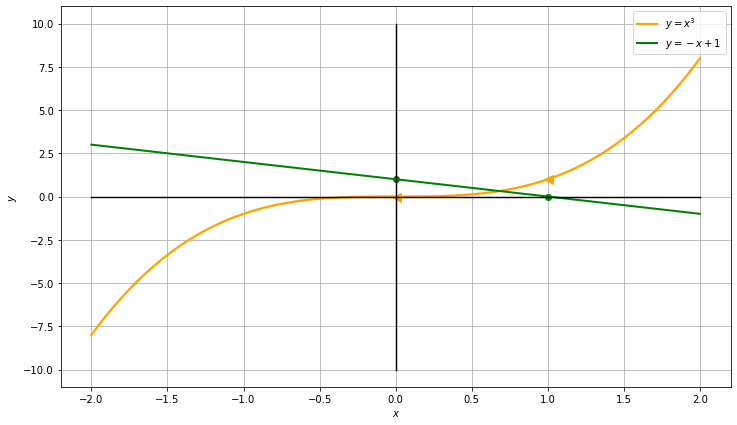

In [84]:
def bisection_plot(a,b, aa, bb):
    def func(x):
        return x**3 + x - 1
    axe_x = np.linspace(a, b, 100)
    axe_y = func(axe_x)
    f_3 = lambda x: x**3
    y_3 = f_3(axe_x)
    f_1 = lambda x: -x+1
    y_1 = f_1(axe_x)
    plt.figure(figsize=(12,7))
    # plt.plot(axe_x, axe_y, label='$y=x^3+x-1$', lw=2, color='blue')
    plt.plot(axe_x, y_3, label='$y=x^3$', lw=2.3, color='orange')
    plt.plot(axe_x, y_1, label='$y=-x+1$', lw=2, color='green')
    plt.plot(1, f_1(1), 'o', color='green')
    plt.plot(0, f_1(0), 'o', color='green')
    plt.plot(1, f_3(1), marker='<', color='orange', ms=9)
    plt.plot(0, f_3(0), marker='<', color='orange', ms=9)
    plt.plot([a,b], [0,0], color='black', lw=1.45)
    plt.plot([0,0], [aa, bb], color='black', lw=1.45)
    plt.grid()
    plt.legend()
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    plt.show()
    
bisection_plot(-2,2, -10,10)

Finding solution using this method:

In [108]:
from numerical_methods import bisection
def func(x):
        return x**3 + x - 1
x = bisection(func, 0, 1, 0.00001, trace=True)
print(x)

m = 0.5000000, [a, b] = [0.5000000, 1.0000000], h = 0.5000000 > 0.0000100 = e
m = 0.7500000, [a, b] = [0.5000000, 0.7500000], h = 0.2500000 > 0.0000100 = e
m = 0.6250000, [a, b] = [0.6250000, 0.7500000], h = 0.1250000 > 0.0000100 = e
m = 0.6875000, [a, b] = [0.6250000, 0.6875000], h = 0.0625000 > 0.0000100 = e
m = 0.6562500, [a, b] = [0.6562500, 0.6875000], h = 0.0312500 > 0.0000100 = e
m = 0.6718750, [a, b] = [0.6718750, 0.6875000], h = 0.0156250 > 0.0000100 = e
m = 0.6796875, [a, b] = [0.6796875, 0.6875000], h = 0.0078125 > 0.0000100 = e
m = 0.6835938, [a, b] = [0.6796875, 0.6835938], h = 0.0039062 > 0.0000100 = e
m = 0.6816406, [a, b] = [0.6816406, 0.6835938], h = 0.0019531 > 0.0000100 = e
m = 0.6826172, [a, b] = [0.6816406, 0.6826172], h = 0.0009766 > 0.0000100 = e
m = 0.6821289, [a, b] = [0.6821289, 0.6826172], h = 0.0004883 > 0.0000100 = e
m = 0.6823730, [a, b] = [0.6821289, 0.6823730], h = 0.0002441 > 0.0000100 = e
m = 0.6822510, [a, b] = [0.6822510, 0.6823730], h = 0.0001221 > 

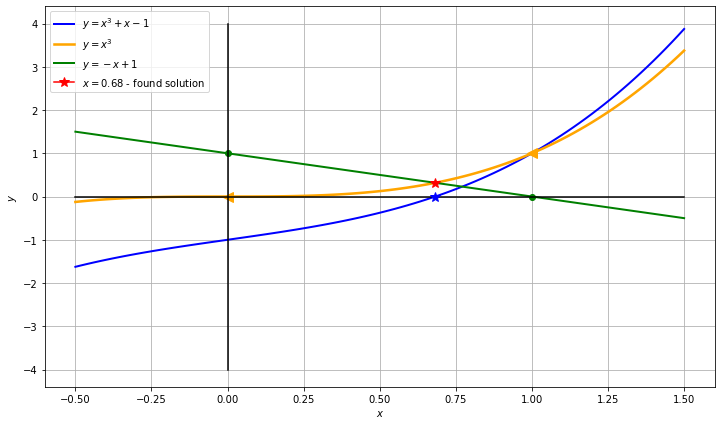

In [107]:
def bisection_plot(a,b, aa, bb):
    def func(x):
        return x**3 + x - 1
    axe_x = np.linspace(a, b, 100)
    axe_y = func(axe_x)
    f_3 = lambda x: x**3
    y_3 = f_3(axe_x)
    f_1 = lambda x: -x+1
    y_1 = f_1(axe_x)
    plt.figure(figsize=(12,7))
    plt.plot(axe_x, axe_y, label='$y=x^3+x-1$', lw=2, color='blue')
    plt.plot(axe_x, y_3, label='$y=x^3$', lw=2.55, color='orange')
    plt.plot(axe_x, y_1, label='$y=-x+1$', lw=2, color='green')
    plt.plot(1, f_1(1), 'o', color='green')
    plt.plot(0, f_1(0), 'o', color='green')
    plt.plot(1, f_3(1), marker='<', color='orange', ms=10)
    plt.plot(0, f_3(0), marker='<', color='orange', ms=10)
    plt.plot([a,b], [0,0], color='black', lw=1.5)
    plt.plot([0,0], [aa, bb], color='black', lw=1.5)
    plt.plot(x, f_3(x), marker='*', color='red', label=f'$x = {x:.2f}$ - found solution', ms=11)
    plt.plot(x, func(x), marker='*', color='blue', ms=10)
    plt.grid()
    plt.legend()
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    plt.show()
    
bisection_plot(-.5,1.5,-4,4)